# **Análise de Anna**

In [21]:
import seaborn as sns
sns.set_palette('Set2')

In [22]:
import pandas as pd

url = 'https://gist.githubusercontent.com/rioto9858/ff72b72b3bf5754d29dd1ebf898fc893/raw/1164a139a780b0826faef36c865da65f2d3573e0/top50MusicFrom2010-2019.csv'

df_songs = pd.read_csv(url)

In [23]:
df_songs

,title,artist,the genre of the track,year,Beats.Per.Minute -The tempo of the song,"Energy- The energy of a song - the higher the value, the more energtic","Danceability - The higher the value, the easier it is to dance to this song","Loudness/dB - The higher the value, the louder the song","Liveness - The higher the value, the more likely the song is a live recording","Valence - The higher the value, the more positive mood for the song",Length - The duration of the song,Acousticness - The higher the value the more acoustic the song is,Speechiness - The higher the value the more spoken word the song contains,Popularity- The higher the value the more popular the song is
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


TRATAMENTO DOS DADOS


In [24]:
#Como já fiz antes, na segunda etapa irei trocar os nomes para facilitar.

df_songs = df_songs[['title','artist','the genre of the track', "Energy- The energy of a song - the higher the value, the more energtic","Danceability - The higher the value, the easier it is to dance to this song", "Valence - The higher the value, the more positive mood for the song", 'Popularity- The higher the value the more popular the song is']]
df_songs.columns = ['Nome', 'Artista', 'Genero', 'Energia', 'Dançabilidade', 'Positividade', 'Popularidade']


df_songs.dtypes #E, novamente verificando os tipos caso sejam necessarios depois


Nome             object
Artista          object
Genero           object
Energia           int64
Dançabilidade     int64
Positividade      int64
Popularidade      int64
dtype: object

Gostaria de responder as perguntas:

Qual a relação entre:


1.   Positividade e Popularidade
2.   Energia e Dançabilidade
3.   Dançabilidade e Positividade
4.   Genero e Positividade





In [25]:
df_songs

,Nome,Artista,Genero,Energia,Dançabilidade,Positividade,Popularidade
0,"Hey, Soul Sister",Train,neo mellow,89,67,80,83
1,Love The Way You Lie,Eminem,detroit hip hop,93,75,64,82
2,TiK ToK,Kesha,dance pop,84,76,71,80
3,Bad Romance,Lady Gaga,dance pop,92,70,71,79
4,Just the Way You Are,Bruno Mars,pop,84,64,43,78
...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,66,61,16,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,79,75,61,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,76,53,65,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,79,60,24,69


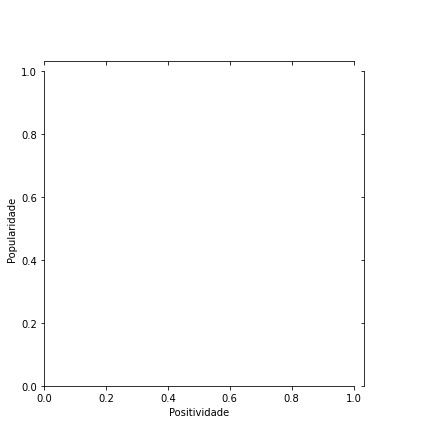

In [26]:
sns.JointGrid(data=df_songs, x="Positividade", y="Popularidade")

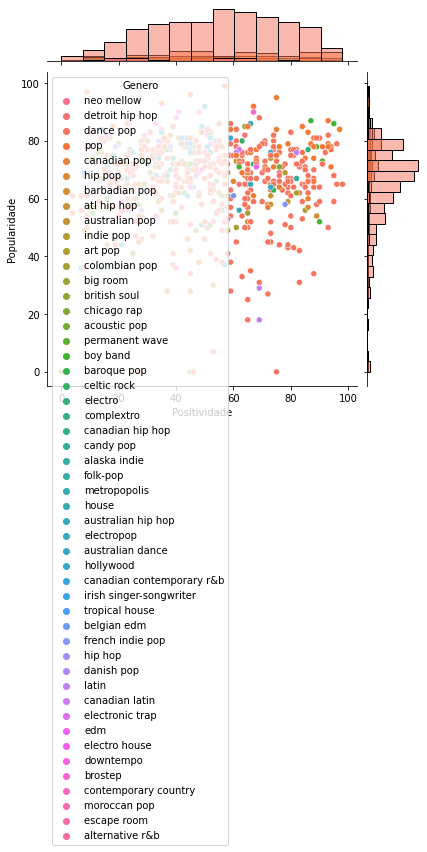

In [27]:
pospop = sns.JointGrid(data=df_songs, x="Positividade", y="Popularidade", hue = "Genero")
pospop.plot(sns.scatterplot, sns.histplot)
sns.set_palette("pastel")

Tem muito mais generos do que antecipei, então tentarei unir alguns dos temas repetitivos

In [28]:
Genero = df_songs['Genero']
Genero

0           neo mellow
1      detroit hip hop
2            dance pop
3            dance pop
4                  pop
            ...       
598          dance pop
599                pop
600          dance pop
601          dance pop
602         electropop
Name: Genero, Length: 603, dtype: object

In [29]:
for i in range (len(Genero)):
  if 'pop' in Genero[i]:
    Genero[i] = 'pop'

Genero

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0           neo mellow
1      detroit hip hop
2                  pop
3                  pop
4                  pop
            ...       
598                pop
599                pop
600                pop
601                pop
602                pop
Name: Genero, Length: 603, dtype: object

In [30]:
for i in range (len(Genero)):
  if 'hip hop' in Genero[i]:
    Genero[i] = 'hip hop'

Genero

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      neo mellow
1         hip hop
2             pop
3             pop
4             pop
          ...    
598           pop
599           pop
600           pop
601           pop
602           pop
Name: Genero, Length: 603, dtype: object

In [31]:
df_songs

,Nome,Artista,Genero,Energia,Dançabilidade,Positividade,Popularidade
0,"Hey, Soul Sister",Train,neo mellow,89,67,80,83
1,Love The Way You Lie,Eminem,hip hop,93,75,64,82
2,TiK ToK,Kesha,pop,84,76,71,80
3,Bad Romance,Lady Gaga,pop,92,70,71,79
4,Just the Way You Are,Bruno Mars,pop,84,64,43,78
...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,pop,66,61,16,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,79,75,61,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,pop,76,53,65,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,pop,79,60,24,69


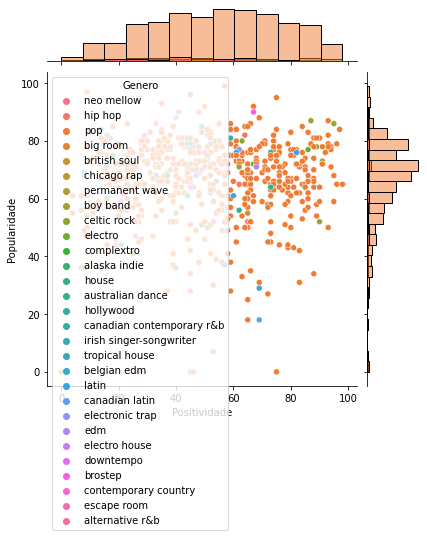

In [32]:
pospop = sns.JointGrid(data=df_songs, x="Positividade", y="Popularidade", hue = "Genero")
pospop.plot(sns.scatterplot, sns.histplot)
sns.set_palette("pastel")

Ainda assim, tem muitos generos. Então vou pegar apenas os 5 mais frequentes.


In [33]:
import numpy as np
np.unique(Genero)

array(['alaska indie', 'alternative r&b', 'australian dance',
       'belgian edm', 'big room', 'boy band', 'british soul', 'brostep',
       'canadian contemporary r&b', 'canadian latin', 'celtic rock',
       'chicago rap', 'complextro', 'contemporary country', 'downtempo',
       'edm', 'electro', 'electro house', 'electronic trap',
       'escape room', 'hip hop', 'hollywood', 'house',
       'irish singer-songwriter', 'latin', 'neo mellow', 'permanent wave',
       'pop', 'tropical house'], dtype=object)

In [34]:
GenPop = df_songs.groupby('Genero',as_index=False)['Nome'].count() #Moda
GenPop

,Genero,Nome
0,alaska indie,1
1,alternative r&b,1
2,australian dance,6
3,belgian edm,2
4,big room,10
5,boy band,15
6,british soul,11
7,brostep,2
8,canadian contemporary r&b,9
9,canadian latin,1


In [35]:
GenPop = GenPop.sort_values(by = 'Nome', ascending=False).head(5)
GenPop

,Genero,Nome
27,pop,485
5,boy band,15
20,hip hop,14
6,british soul,11
4,big room,10


Pronto ! Agora sim podemos usar no gráfico.

In [36]:
df_songs = df_songs.drop(df_songs[(df_songs.Genero != 'pop') & (df_songs.Genero != 'boy band') & (df_songs.Genero != 'hip hop') & (df_songs.Genero != 'british soul') & (df_songs.Genero != 'big room')].index)

df_songs

,Nome,Artista,Genero,Energia,Dançabilidade,Positividade,Popularidade
1,Love The Way You Lie,Eminem,hip hop,93,75,64,82
2,TiK ToK,Kesha,pop,84,76,71,80
3,Bad Romance,Lady Gaga,pop,92,70,71,79
4,Just the Way You Are,Bruno Mars,pop,84,64,43,78
5,Baby,Justin Bieber,pop,86,73,54,77
...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,pop,66,61,16,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,79,75,61,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,pop,76,53,65,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,pop,79,60,24,69


Gráfico entre Positividade e Popularidade

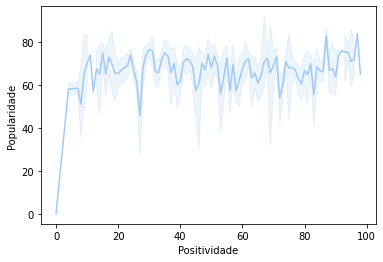

In [37]:
pospop = sns.lineplot(data=df_songs, x="Positividade", y="Popularidade")

Gráfico de Dançabilidade e energia.

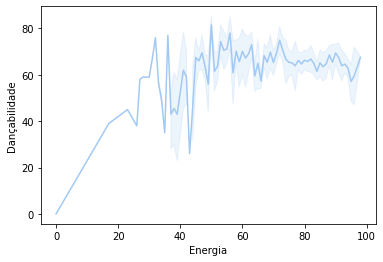

In [38]:
EnDa = sns.lineplot(data=df_songs, x="Energia", y="Dançabilidade")
sns.set_palette("hot")

Gráfico de Dançabilidade e Positividade.



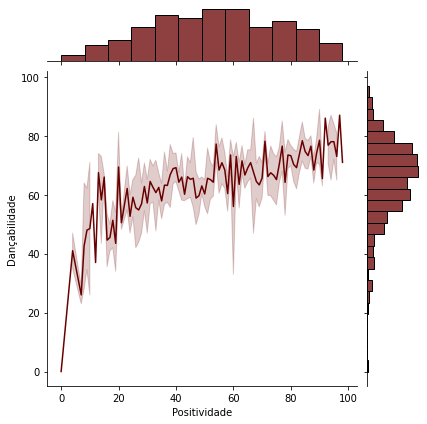

In [39]:
DanPos = sns.JointGrid(data=df_songs, x="Positividade", y="Dançabilidade")
DanPos.plot(sns.lineplot, sns.histplot)
sns.set_palette("gist_earth")

Gráfico de Genero e Positividade.

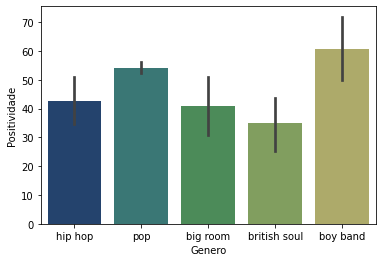

In [40]:
GennPos = sns.barplot(data=df_songs, x="Genero", y="Positividade")

# **Conclusão:**

  Positividade e popularidade, pelos gráficos, não parecem ter uma correlação muito notável embora pareça ter uma ascenção no início. Dançabilidade e Energia parece ter um pouco maior que a anterior mas ainda assim, não muita. Surpreendentemente, dançabilidade e positividade aparentam ter uma maior correlação.

>  ..................................................................................................................................


Dos top5 Generos mais frequentes nesse Top50 do Spotify, a ordem de mais positivos para menos são: Boy band, Pop, Hip hop, Big room e British Soul.

Com apenas os 2 primeiros com mais de 50 de nota de positividade.

# **Análise de Gabrielly**

* Visualização por meio de gráfico de barras para um melhor entendimento dos dados estudados 

In [41]:
#testando os dados 

dados = pd.read_csv("https://raw.githubusercontent.com/oyeoyeleye/Spotify-Song-Analysis-Classification/main/Spotify2020.csv")
dados 

,Unnamed: 0,artist_name,popularity,track_id,track_name,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,SZA,92,3YJJjQPAbDT7mGpX3WtQ9A,Good Days,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,0.49900,0.4360,279204,0.6550,0.000008,1,0.6880,-8.370,0,0.0583,121.002,4,0.4120
1,1,Hammock,35,51TAp7p7B3xboCl5HWmEkF,Longest Year - 2020,spotify:artist:0VOR7Ie9xUSb45fzIIVJQ1,0.70000,0.0692,533707,0.2850,0.673000,2,0.1990,-14.854,1,0.0482,78.572,4,0.0312
2,2,24kGoldn,95,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),spotify:artist:6fWVd57NKTalqvmjRd2t8Z,0.22100,0.7000,140526,0.7220,0.000000,7,0.2720,-3.558,0,0.0369,90.989,4,0.7560
3,3,Hammock,40,79hqdNpnWPVVxmZiDfKaIL,Dark Beyond the Blue - 2020,spotify:artist:0VOR7Ie9xUSb45fzIIVJQ1,0.72900,0.2000,325680,0.2820,0.887000,2,0.0837,-19.803,0,0.0468,74.381,3,0.0372
4,4,CJ,93,5vGLcdRuSbUhD8ScwsGSdA,Whoopty,spotify:artist:7arQA31aZVS8yS6zUveWzb,0.19000,0.7110,123429,0.5980,0.000000,3,0.1500,-7.621,0,0.1820,140.175,4,0.7370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1942,DaBaby,65,0oT9ElXYSxvnOOagP9efDq,JUMP (feat. YoungBoy Never Broke Again),spotify:artist:4r63FhuTkUYltbVAg5TQnk,0.16900,0.8960,212093,0.7200,0.000000,0,0.2520,-6.262,0,0.3550,140.100,4,0.9660
1943,1943,Vishal Casey,69,70w16KjhO0HQz6eqllKYJo,Appreciation,spotify:artist:4gaEPQ8r7KJfK9QE9nV0Wa,0.99000,0.2060,169000,0.0132,0.974000,7,0.1080,-30.649,1,0.0406,74.014,3,0.0872
1944,1944,Scent of the Pine,3,1s4xvv4rx7JXUUbL60jF3k,its Goin' to be a good year,spotify:artist:3btgvM7e9Bc6qYAYz0M7XV,0.00928,0.3980,73693,0.4900,0.871000,9,0.3660,-13.338,1,0.0267,169.984,4,0.3010
1945,1945,Lil Xxel,70,4s0hDz7zGgZUav9EvzyLsB,LMK,spotify:artist:7iDeMFJKjI1ak40N3hoYOZ,0.02920,0.7480,188293,0.4570,0.000294,6,0.4440,-7.560,1,0.0465,123.035,4,0.4640


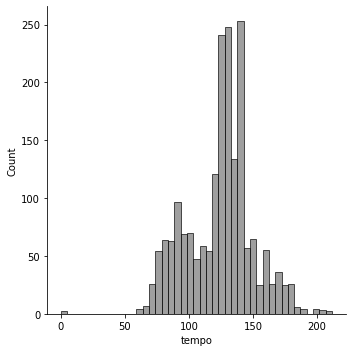

In [42]:
#análise do tempo total em que cada música foi escutada
sns.displot(dados.query("tempo<100000"),x='tempo',  color='#7f7f7f')

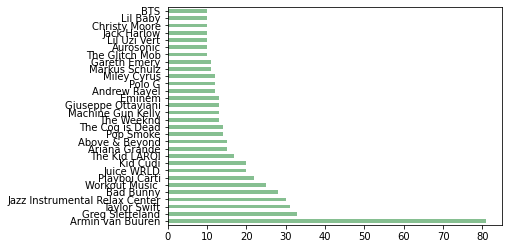

In [43]:
#artistas que a maior quantidade de músicas nesse período de tempo
dados['artist_name'].value_counts().head(30).plot(kind='barh', color='#86bf91')

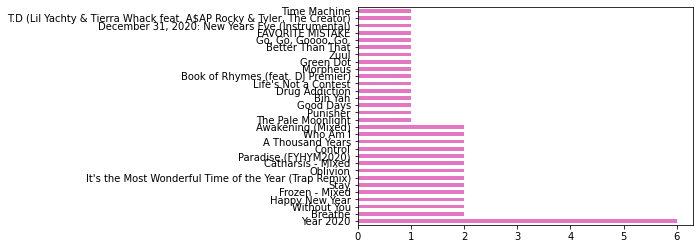

In [44]:
#quantidade de novas versões da mesma música
dados['track_name'].value_counts().head(30).plot(kind='barh', color='#e377c2')

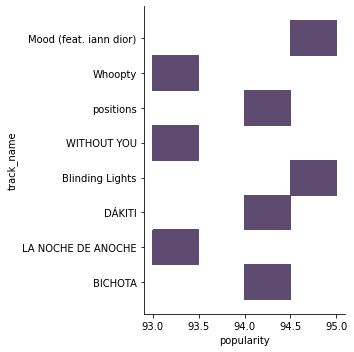

In [45]:
#as músicas mais populares
sns.displot(dados.query("popularity>92"), x="popularity", y="track_name", color='#9467bd')

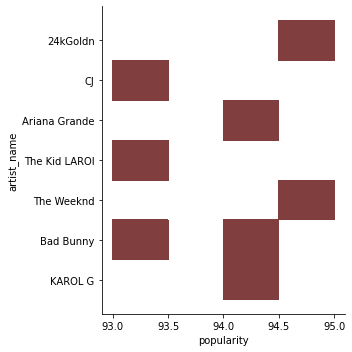

In [46]:
#os artistas mais populares
sns.displot(dados.query("popularity>92"), x="popularity", y="artist_name", color='#A52A2A')

# Conclusão

Sabemos que a música tem o poder de relaxar e ajudar na superação de fases difíceis, por meio dos gráficos observados, é notório que algumas músicas tiveram uma quantidade expressiva de tempo a mais escutada do que outras no período, entre elas, estão: "Blinding lights" de The Weeknd, "Mood(feat. iann dior)" de 24KGoldn e "Positions" de Ariana Grande. Já os artistas mais escutados no ano de 2020, foram: "The Weeknd", "24KGolden" e "Ariagan Grnade".

# **Análise de Beatriz**

In [ ]:
import pandas as pd
import seaborn as sns 
import numpy as np

In [ ]:
songs = pd.read_csv("/Users/beatr/Downloads/songs_normalize.csv")

# https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

# Analise das musicas explicitas


-comparação de quantidade
-timeline
-top 10 generos e artistas

([<matplotlib.patches.Wedge at 0x24c02d6d190>,
 [Text(-0.7130780864241404, 0.8375676943756167, 'musicas normais'),
  Text(0.7130780864241403, -0.8375676943756168, 'musicas explicitas')])

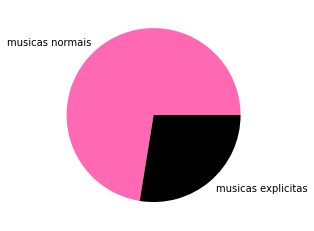

In [ ]:
musicas_normais = songs[songs.explicit == False]
a = musicas_normais.shape[0]
musicasexp = songs[songs.explicit == True]
b = musicasexp.shape[0]
grafico = np.array([a, b])
cores = ["hotpink","black"]
l = ["musicas normais", "musicas explicitas"]
plt.pie(grafico , labels = l , colors = cores)

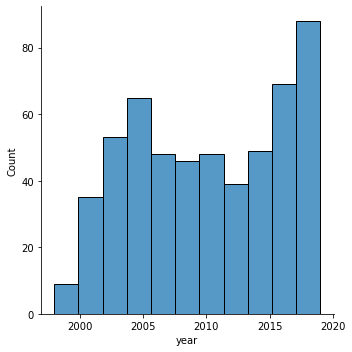

In [ ]:
sns.displot(musicasexp.query("year<2020"),x='year')

<AxesSubplot:>

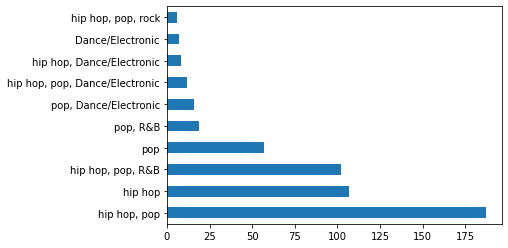

In [ ]:
musicasexp['genre'].value_counts().head(10).plot(kind='barh')

<AxesSubplot:>

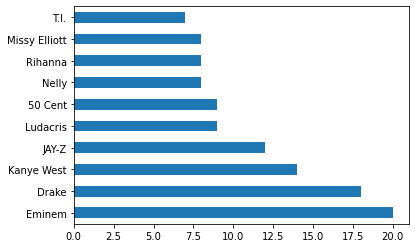

In [ ]:
musicasexp['artist'].value_counts().head(10).plot(kind='barh')

# Conclusão:

Concluimos que as musicas explicitas representam aprocimadamente 25% dos dados estudados, houve um crescimento em sua quantidade ao longo dos anos e, como esperado, o hip hop é o genero dominante

# Bonus

Tendo visto os generos mais presentes nas musicas analisadas, vamos verificar o tempo (batidas por minuto) delas, equivalente a velocidade ou ritmo de uma determinada musica e deriva.

In [ ]:
novodf = musicasexp.drop(musicasexp[(musicasexp.genre != 'pop') & (musicasexp.genre != 'rock') & (musicasexp.genre != 'hip hop')].index)

<AxesSubplot:xlabel='tempo', ylabel='Count'>

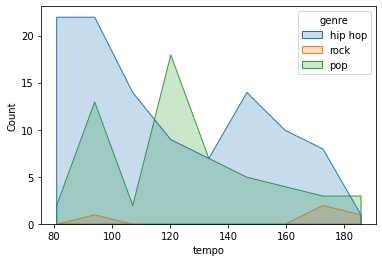

In [ ]:
sns.histplot(x="tempo",data=novodf, hue = "genre", element="poly")

In [ ]:
Observamos que o hip hop apresenta um tempo baixo, mas vamos usar dados das musicas normais para comparar

In [ ]:
novodf = songs.drop(songs[(songs.genre != 'pop') & (songs.genre != 'rock') & (songs.genre != 'hip hop')].index)

<AxesSubplot:xlabel='tempo', ylabel='Count'>

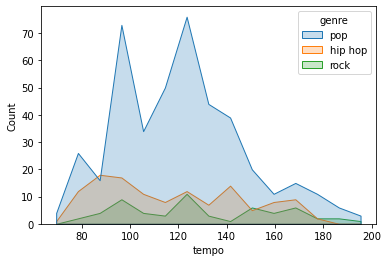

In [ ]:
sns.histplot(x="tempo",data=novodf, hue = "genre", element="poly")